In [1]:
import sys
sys.path.append('../')

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from pandas import read_csv

from matplotlib.font_manager import fontManager, FontProperties

path = "../times_new_roman.ttf"
fontManager.addfont(path)

prop = FontProperties(fname=path)
plt.style.use('seaborn-paper')
sns.set(font=prop.get_name(), style='whitegrid')

In [3]:
import pickle
import glob

from pandas import DataFrame

def plot_multiple(score_list, labels, dot_types, key, title=None, as_svg=True, st_idx=0, fig_title=None):
    merged = {'itr': [], key: [], 'model_size': [], 'dataset': []}
    for idx, score_dict in enumerate(score_list):
        iterations = [itr for itr in score_dict if itr >= st_idx]
        iterations.sort()
        score_list = [score_dict[itr] for itr in iterations]
        merged['itr'] += [itr/1000 for itr in iterations]
        merged[key] += score_list
        merged['model_size'] += [labels[idx]] * len(iterations)
        
        merged['dataset'] += [labels[idx]]*len(iterations)

    plt.locator_params(axis='x', nbins=5)        
    df = pd.DataFrame(merged)
    obj = sns.lineplot(data=df, x="itr", y=key, hue='model_size', style="model_size", palette=['black', 'black'])
    obj.set_xlabel('thousand steps', fontsize=30)
    obj.set_ylabel(key, fontsize=30)
    for label in (obj.get_xticklabels() + obj.get_yticklabels()):
        label.set_fontsize(25)    

    plt.setp(obj.get_legend().get_texts(), fontsize=25)
    obj.get_legend().set_title(None)
    if fig_title:
        obj.set_title(fig_title, fontsize=30)
    plt.show()
    if title:
        obj.get_figure().savefig('figs/{}.ps'.format(title), bbox_inches="tight")
    

import numpy as np
def get_mean_score(all_scores, ignore_first=False):
    mean_score = {}
    
    for itr in all_scores[0]:
        if ignore_first and itr==3000:
            continue
        curr = []
        if itr> 400000:
            continue
        for score in all_scores:
            if itr in score and not np.isnan(score[itr]):
                curr.append(100.0*score[itr])
        if len(curr) > 0:
            mean_score[itr] = np.mean(curr)
        else:
            mean_score[itr] = 0.0
    return mean_score

    
folder_names_tense = ['lm_4layers_tense_102_sci',
'lm_4layers_tense_112_sci',
'lm_4layers_tense_122_sci',
'lm_4layers_tense_132_sci',
'lm_4layers_tense_42_sci',
'lm_4layers_tense_52_sci',
'lm_4layers_tense_62_sci',
'lm_4layers_tense_72_sci',
'lm_4layers_tense_82_sci',
'lm_4layers_tense_92_sci']

    
data = read_csv('../all_scores_tense.csv')


all_test_accs = {}
all_val_accs = {}

for folder_name in folder_names_tense:
    key = folder_name[:-4]
    print(key)
    seed = key.split('_')[-1]
    curr_test_accs = {(itr+1)*3000: data['{}-{} - test_aux'.format(key, seed)][itr] for itr in range(100)}
    all_test_accs[folder_name] = curr_test_accs

    curr_val_accs = {(itr+1)*3000: data['{}-{} - val_aux'.format(key, seed)][itr] for itr in range(100)}
    all_val_accs[folder_name] = curr_val_accs

    


lm_4layers_tense_102
lm_4layers_tense_112
lm_4layers_tense_122
lm_4layers_tense_132
lm_4layers_tense_42
lm_4layers_tense_52
lm_4layers_tense_62
lm_4layers_tense_72
lm_4layers_tense_82
lm_4layers_tense_92


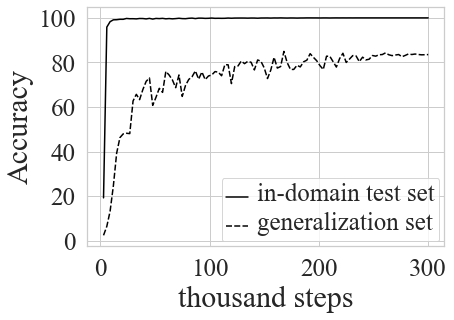

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
plot_multiple([get_mean_score([value for _, value in all_val_accs.items()]),
              get_mean_score([value for _, value in all_test_accs.items()])], 
              ['in-domain test set', 'generalization set'], ['o'], 
              'Accuracy', title='tense_data')


In [5]:
folder_names_6 = [
'lm_6layers_f_more_itrs_102_sci',
'lm_6layers_f_more_itrs_112_sci',
'lm_6layers_f_more_itrs_122_sci',
'lm_6layers_f_more_itrs_132_sci',
'lm_6layers_f_more_itrs_42_sci',
'lm_6layers_f_more_itrs_52_sci',
'lm_6layers_f_more_itrs_62_sci',
'lm_6layers_f_more_itrs_72_sci',
'lm_6layers_f_more_itrs_82_sci',
'lm_6layers_f_more_itrs_92_sci'
]


data = read_csv('../all_test_scores_lm.csv')


all_test_accs_qf = {}
for folder_name in folder_names_6:
    key = folder_name[:-4]
    print(key)
    seed = key.split('_')[-1]
    curr_test_accs = {(itr+1)*3000: data['{}-{} - test_aux'.format(key, seed)][itr] for itr in range(100)}
    all_test_accs_qf[folder_name] = curr_test_accs

data_val = read_csv('../all_val_scores_lm.csv')


all_val_accs_qf = {}
for folder_name in folder_names_6:
    key = folder_name[:-4]
    seed = key.split('_')[-1]
    curr_val_accs = {(itr+1)*3000: data_val['{}-{} - val_aux'.format(key, seed)][itr] for itr in range(100)}
    all_val_accs_qf[folder_name] = curr_val_accs

lm_6layers_f_more_itrs_102
lm_6layers_f_more_itrs_112
lm_6layers_f_more_itrs_122
lm_6layers_f_more_itrs_132
lm_6layers_f_more_itrs_42
lm_6layers_f_more_itrs_52
lm_6layers_f_more_itrs_62
lm_6layers_f_more_itrs_72
lm_6layers_f_more_itrs_82
lm_6layers_f_more_itrs_92


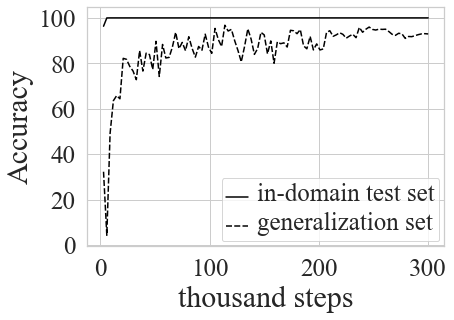

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [6]:
plot_multiple([get_mean_score([value for _, value in all_val_accs_qf.items()]),
              get_mean_score([value for _, value in all_test_accs_qf.items()])], 
              ['in-domain test set', 'generalization set'], ['o'], 
              'Accuracy', title='qf_data')



lm_6layers_dyck_102
lm_6layers_dyck_112
lm_6layers_dyck_122
lm_6layers_dyck_132
lm_6layers_dyck_42
lm_6layers_dyck_52
lm_6layers_dyck_62
lm_6layers_dyck_72
lm_6layers_dyck_82
lm_6layers_dyck_92


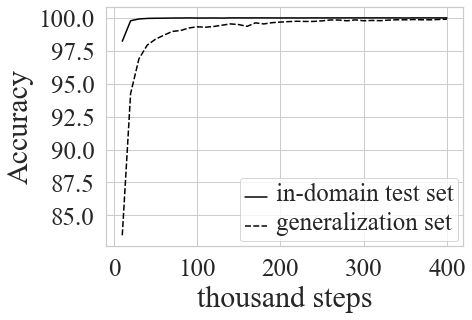

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
folder_names_dyck = ['lm_6layers_dyck_102_sci',
'lm_6layers_dyck_112_sci',
'lm_6layers_dyck_122_sci',
'lm_6layers_dyck_132_sci',
'lm_6layers_dyck_42_sci',
'lm_6layers_dyck_52_sci',
'lm_6layers_dyck_62_sci',
'lm_6layers_dyck_72_sci',
'lm_6layers_dyck_82_sci',
'lm_6layers_dyck_92_sci']

data = read_csv('../dyck_6.csv')

all_test_accs_dyck = {}
all_val_accs_dyck = {}

for folder_name in folder_names_dyck:
    key = folder_name[:-4]
    print(key)
    seed = key.split('_')[-1]
    curr_test_accs = {(itr+1)*10000: data['{}-{} - test_aux'.format(key, seed)][itr] for itr in range(100)}
    all_test_accs_dyck[folder_name] = curr_test_accs

    curr_val_accs = {(itr+1)*10000: data['{}-{} - val_aux'.format(key, seed)][itr] for itr in range(100)}
    all_val_accs_dyck[folder_name] = curr_val_accs

    

plot_multiple([get_mean_score([value for _, value in all_val_accs_dyck.items()]),
              get_mean_score([value for _, value in all_test_accs_dyck.items()])], 
              ['in-domain test set', 'generalization set'], ['o'], 
              'Accuracy', title='dyck_data')



